# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [68]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [69]:
cities

['sarkand',
 'jamestown',
 'new norfolk',
 'port alfred',
 'saint-pierre',
 'zyryanka',
 'hambantota',
 'bluff',
 'coihaique',
 'qaanaaq',
 'bakchar',
 'upernavik',
 'vaini',
 'peleduy',
 'mehamn',
 'mar del plata',
 'senneterre',
 'miyang',
 'arraial do cabo',
 'broome',
 'ribeira grande',
 'talnakh',
 'vaitupu',
 'tasiilaq',
 'turukhansk',
 'chipinge',
 'kodiak',
 'palana',
 'oranjemund',
 'atuona',
 'taolanaro',
 'aksu',
 'albany',
 'dikson',
 'busselton',
 'comodoro rivadavia',
 'mataura',
 'lebu',
 'ushuaia',
 'colac',
 'kapaa',
 'yellowknife',
 'beringovskiy',
 'pisco',
 'honningsvag',
 'college',
 'thompson',
 'zeya',
 'hermanus',
 'barentsburg',
 'bilibino',
 'rikitea',
 'chokurdakh',
 'saint george',
 'soyo',
 'hilo',
 'attawapiskat',
 'marsa matruh',
 'bambous virieux',
 'saskylakh',
 'san quintin',
 'tazovskiy',
 'petropavlovsk-kamchatskiy',
 'bengkulu',
 'chifeng',
 'longyearbyen',
 'grindavik',
 'tucuman',
 'huejuquilla el alto',
 'flinders',
 'alofi',
 'bunbury',
 'saleau

In [70]:
api_key = weather_api_key
units = 'imperial'
url = 'http://api.openweathermap.org/data/2.5/weather?units='+units+'&APPID='+api_key+'&q='

# response = requests.get(url + "alameda,ca")
# response.json()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [71]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")
#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}{city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}{city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
        print(f"{url}{city}")

    continue       



Beginning Data Retrieval
-------------------------------
Processing Record 1 | Sarkand
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=sarkand
Processing Record 2 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=jamestown
Processing Record 3 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=new norfolk
Processing Record 4 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=port alfred
Processing Record 5 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=saint-pierre
Processing Record 6 | Zyryanka
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=zyryanka
Processing Record 7 | Hambantota
http://api.openweathermap.org/da

Processing Record 54 | Marsá Maţrūḩ
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=marsa matruh
Processing Record 55 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=bambous virieux
Processing Record 56 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=saskylakh
Processing Record 57 | San Quintín
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=san quintin
Processing Record 58 | Tazovsky
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=tazovskiy
Processing Record 59 | Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=petropavlovsk-kamchatskiy
Processing Record 60 | Bengkulu
http://api.openweathermap.org/data/2.5/

Processing Record 105 | Chiang Rai
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=chiang rai
Processing Record 106 | Elizabeth City
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=elizabeth city
Processing Record 107 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=dingle
Processing Record 108 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=barrow
Processing Record 109 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=saldanha
Processing Record 110 | Mt. Pleasant
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=mount pleasant
Processing Record 111 | Kitsuki
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771

Processing Record 159 | Karasjok
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=karasjok
Processing Record 160 | Bilma
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=bilma
Processing Record 161 | Flin Flon
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=flin flon
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=takob
Processing Record 162 | Yabrūd
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=yabrud
Processing Record 163 | West Wendover
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=west wendover
Processing Record 164 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&

Processing Record 211 | Gizo Government Station
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=gizo
Processing Record 212 | Asău
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=asau
Processing Record 213 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=cidreira
Processing Record 214 | Mongu
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=mongu
Processing Record 215 | Kargil
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=kargil
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=angra
Processing Record 216 | Khovd
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=hovd
Process

Processing Record 263 | Broken Hill
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=broken hill
Processing Record 264 | Santa Flavia
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=santa flavia
Processing Record 265 | Kukmor
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=kukmor
Processing Record 266 | Lakes Entrance
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=lakes entrance
Processing Record 267 | Along
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=along
Processing Record 268 | Cockburn Town
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=cockburn town
Processing Record 269 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=

Processing Record 316 | Tevaitoa
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=tevaitoa
Processing Record 317 | Tsabong
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=tsabong
Processing Record 318 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=hithadhoo
Processing Record 319 | Poshekhon'ye
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=poshekhonye
Processing Record 320 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=salalah
Processing Record 321 | Tornio
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=tornio
Processing Record 322 | Minatitlán
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=mys shmidta
Processing Record 368 | Sarh
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=sarh
Processing Record 369 | Yairipok
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=yairipok
Processing Record 370 | Zhicheng
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=zhicheng
Processing Record 371 | Bafra
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=bafra
Processing Record 372 | Altamont
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=altamont
Processing Record 373 | Kununurra
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=kununurra

Processing Record 422 | Ayamé
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=ayame
Processing Record 423 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=nanortalik
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=verkhne-katunskoye
Processing Record 424 | Maningrida
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=maningrida
Processing Record 425 | Bayan
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=bayan
Processing Record 426 | Kiunga
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=kiunga
Processing Record 427 | Denpasar
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967

Processing Record 477 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=tuatapere
Processing Record 478 | Deyang
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=deyang
Processing Record 479 | Remanso
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=remanso
Processing Record 480 | Luga
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=louga
Processing Record 481 | Evensk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=evensk
Processing Record 482 | Itamaracá
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=itamaraca
Processing Record 483 | Węgorzewo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=wegorz

Processing Record 534 | Muros
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=muros
Processing Record 535 | Mahébourg
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=mahebourg
Processing Record 536 | Najrān
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=najran
Processing Record 537 | Aksay
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=aksay
Processing Record 538 | Vulcan
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=vulcan
Processing Record 539 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=sioux lookout
Processing Record 540 | Kargasok
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=ka

Processing Record 588 | Weligama
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=weligama
Processing Record 589 | Pilar
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=pilar
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=dolbeau
Processing Record 590 | Aquiraz
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=aquiraz
Processing Record 591 | Escanaba
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=escanaba
Processing Record 592 | Honiara
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=honiara
Processing Record 593 | Laas
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=972fc242a771ca44611f48d634a9e967&q=lasa
Processin

In [72]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City":city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max_temp":max_temp,
    "Wind_speed":wind_speed,
}
# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          596
Cloudiness    596
Country       596
Date          596
Humidity      596
Lat           596
Lng           596
Max_temp      596
Wind_speed    596
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [80]:
weather_data.to_csv(output_data_file)
# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
0,Sarkand,91,KZ,1586642392,36,45.41,79.92,47.91,4.14
1,Jamestown,1,US,1586642384,48,42.10,-79.24,48.00,14.99
2,New Norfolk,75,AU,1586642394,57,-42.78,147.06,52.00,13.87
3,Port Alfred,77,ZA,1586642200,90,-33.59,26.89,68.00,4.00
4,Saint-Pierre,40,RE,1586642297,73,-21.34,55.48,75.20,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

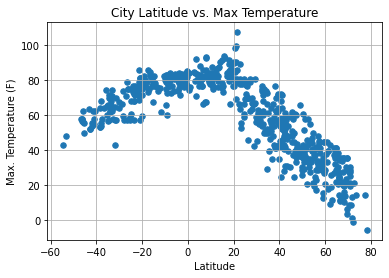

In [81]:
plt.scatter(weather_data["Lat"], weather_data["Max_temp"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

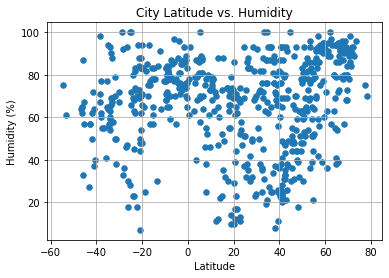

In [82]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

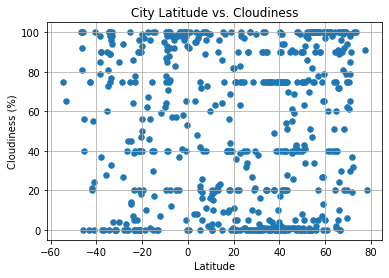

In [83]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

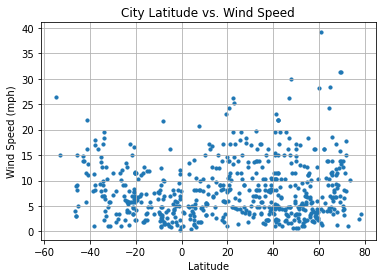

In [84]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind_speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

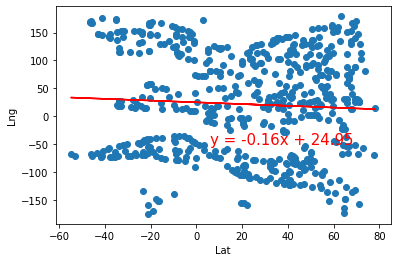

The r-squared is: -0.6790746270164161


In [136]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg_plot(x_values, y_values, text_cord, x_lable, y_lable):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_cord,fontsize=15,color="red")
    plt.xlabel(x_lable)
    plt.ylabel(y_lable)
    plt.show()    

x_values = weather_data['Lat']
y_values = weather_data['Lng']

linear_reg_plot(x_values, y_values, (6,-50), "Lat", "Lng")
print(f"The r-squared is: {rvalue}")


In [86]:
# Create Northern and Southern Hemisphere DataFrames
Southern = weather_data[weather_data["Lat"]<0]
Southern.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
2,New Norfolk,75,AU,1586642394,57,-42.78,147.06,52.00,13.87
3,Port Alfred,77,ZA,1586642200,90,-33.59,26.89,68.00,4.00
4,Saint-Pierre,40,RE,1586642297,73,-21.34,55.48,75.20,3.36
7,Bluff,100,NZ,1586642173,64,-46.60,168.33,57.99,4.00
8,Coyhaique,40,CL,1586642192,57,-45.58,-72.07,50.00,8.05


In [95]:
Northern = weather_data[weather_data["Lat"]>=0]
Northern.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
0,Sarkand,91,KZ,1586642392,36,45.41,79.92,47.91,4.14
1,Jamestown,1,US,1586642384,48,42.10,-79.24,48.00,14.99
5,Zyryanka,5,RU,1586642398,95,65.75,150.85,20.77,11.59
6,Hambantota,26,LK,1586642399,81,6.12,81.12,80.82,10.56
9,Qaanaaq,91,GL,1586642179,75,77.48,-69.36,14.05,2.35


In [ ]:
####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

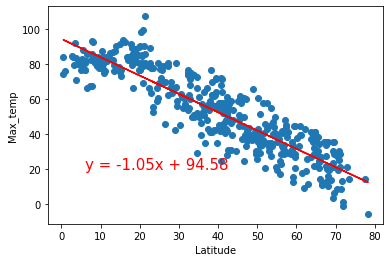

The r-squared is: -0.6790746270164161


In [144]:
linear_reg_plot(Northern['Lat'], Northern['Max_temp'], (6,20), "Latitude", "Max_temp")
x_values = Northern['Lat']
y_values = Northern['Max_temp']
print(f"The r-squared is: {rvalue}")

In [ ]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

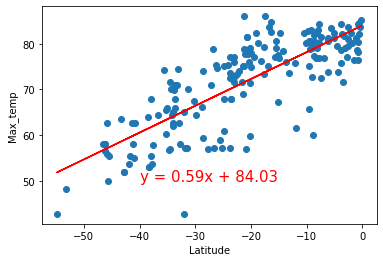

In [111]:
linear_reg_plot(Southern['Lat'], Southern['Max_temp'], (-40,50), "Latitude", "Max_temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

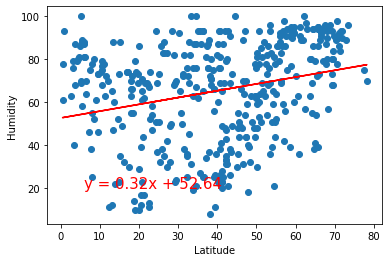

In [131]:
linear_reg_plot(Northern['Lat'], Northern['Humidity'], (6,20), "Latitude", "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

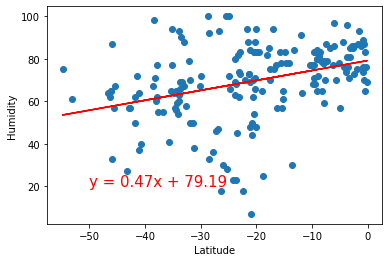

In [130]:
linear_reg_plot(Southern['Lat'], Southern['Humidity'], (-50,20), "Latitude", "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

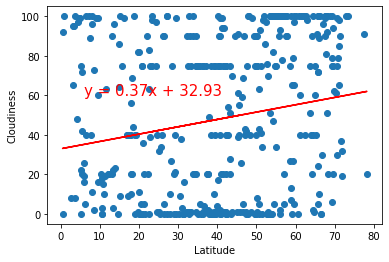

In [129]:
linear_reg_plot(Northern['Lat'], Northern['Cloudiness'], (6,60), "Latitude", "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

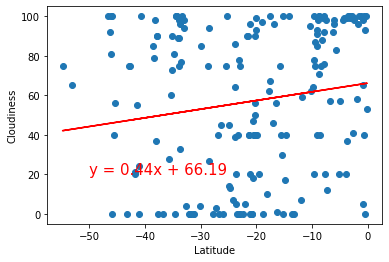

In [128]:
linear_reg_plot(Southern['Lat'], Southern['Cloudiness'], (-50,20), "Latitude", "Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

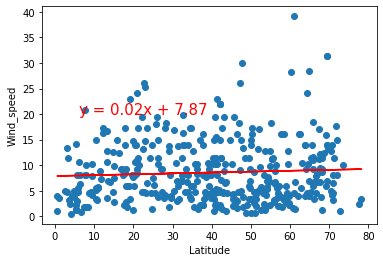

In [127]:
linear_reg_plot(Northern['Lat'], Northern['Wind_speed'], (6,20), "Latitude", "Wind_speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

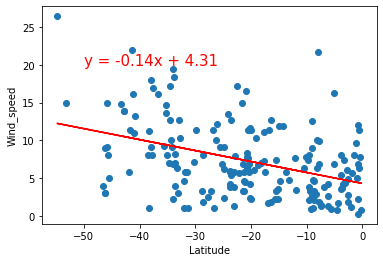

In [135]:
linear_reg_plot(Southern['Lat'], Southern['Wind_speed'], (-50,20), "Latitude", "Wind_speed")